In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge


In [63]:
df=pd.read_csv('/config/workspace/dataset/big_mart_sales.csv')

In [64]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [65]:
df.shape

(8523, 12)

In [66]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [67]:
# Null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [68]:
# Fill the na values
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [69]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [70]:
# checking the duplicate values
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [71]:
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [72]:
# eda
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

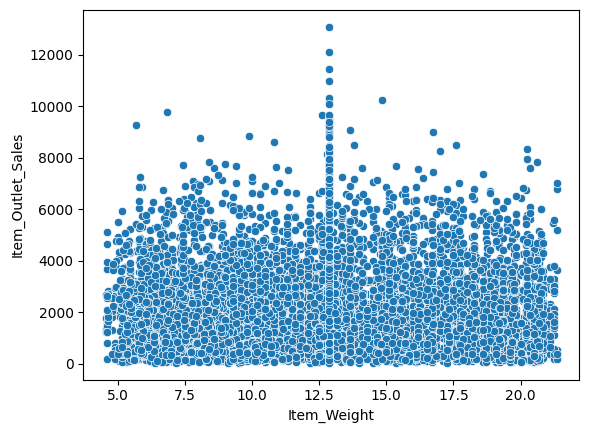

In [73]:
# whether weight is affecting the sale
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

In [74]:
df.groupby(['Item_Weight'],as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales',ascending=False).head(10)

,Item_Weight,Item_Outlet_Sales
326,12.857645,3.633620e+06
318,12.150000,2.131066e+05
350,15.100000,1.825770e+05
377,17.600000,1.681704e+05
334,13.650000,1.603513e+05
284,9.300000,1.589631e+05
404,20.250000,1.585643e+05
390,18.850000,1.583805e+05
361,16.000000,1.532658e+05
298,10.500000,1.482330e+05


/tmp/ipykernel_449/757639230.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


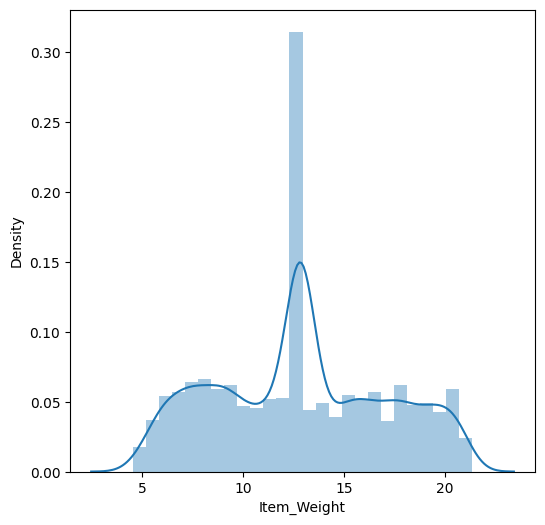

In [75]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

In [76]:
# As such weight is not affecting the outlet price sale

In [77]:
# whether the Item_Fat_Content is affecting the price of sale??
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [78]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [79]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

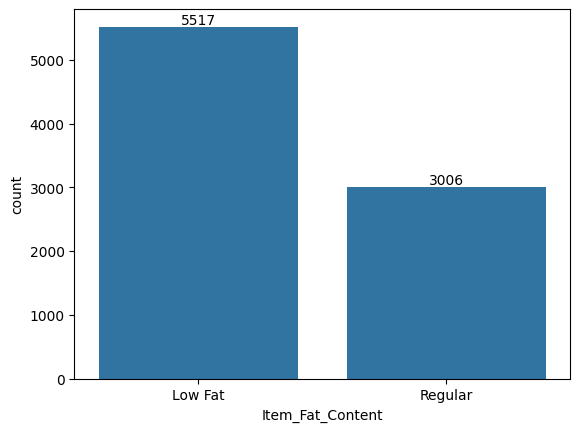

In [80]:
ax = sns.countplot(x = 'Item_Fat_Content',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [81]:
fat_sales=df.groupby(['Item_Fat_Content'],as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales',ascending=False)
fat_sales

,Item_Fat_Content,Item_Outlet_Sales
0,Low Fat,1.190409e+07
1,Regular,6.687031e+06


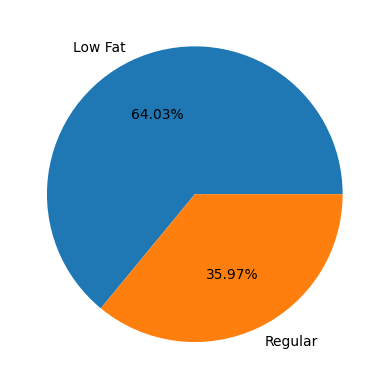

In [82]:
plt.pie(fat_sales['Item_Outlet_Sales'],labels=fat_sales['Item_Fat_Content'],autopct='%1.2f%%')
plt.show()

In [83]:
# Sales of low fat is more than the sales of regular

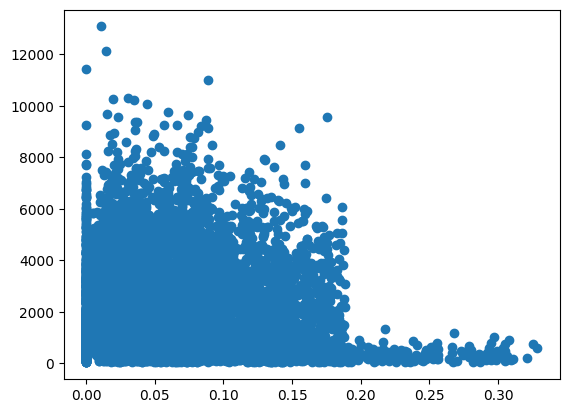

In [84]:
plt.scatter(x='Item_Visibility',y='Item_Outlet_Sales',data=df)
plt.show()

In [85]:
## from above graph we can say that..the value of x get increasing the value of y get decreased,so negeative correlation present in between them

In [86]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

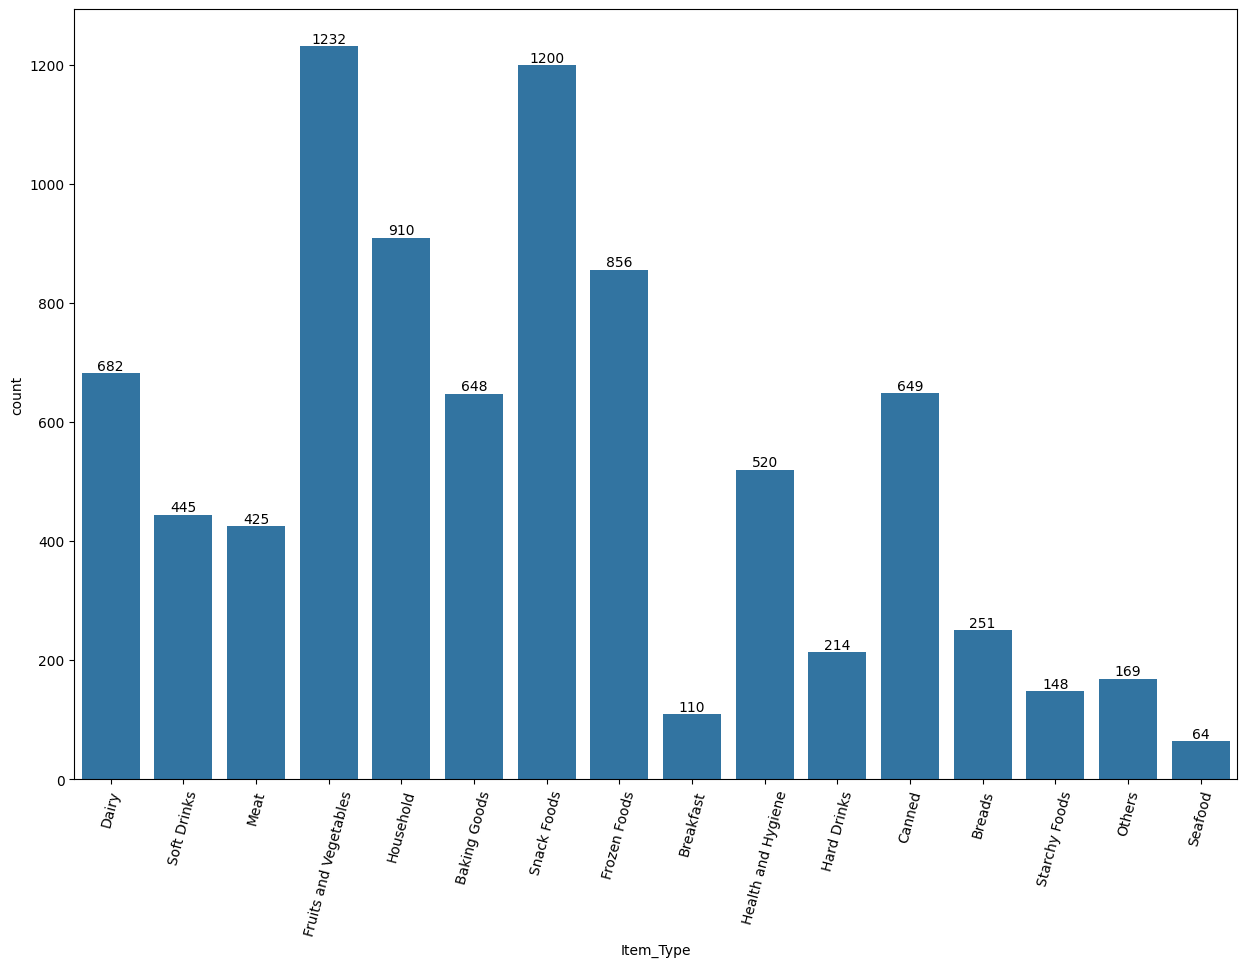

In [87]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=75)
ax = sns.countplot(x = 'Item_Type',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [88]:
df.groupby(['Item_Type'],as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Type,Item_Outlet_Sales
6,Fruits and Vegetables,2.820060e+06
13,Snack Foods,2.732786e+06
9,Household,2.055494e+06
5,Frozen Foods,1.825735e+06
4,Dairy,1.522594e+06
3,Canned,1.444151e+06
0,Baking Goods,1.265525e+06
8,Health and Hygiene,1.045200e+06
10,Meat,9.175656e+05
14,Soft Drinks,8.928977e+05


In [89]:
# the number of item types is directly affecting the item outlet sales

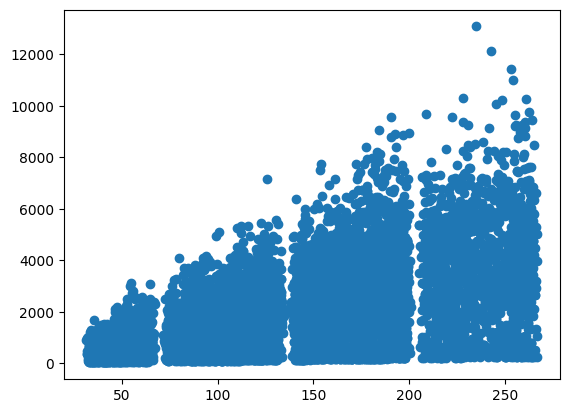

In [90]:
plt.scatter(x='Item_MRP',y='Item_Outlet_Sales',data=df)
plt.show()

In [91]:
# here positive corelation follows..if item mrp increasing then the Item_Outlet_Sales also increasing

In [92]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

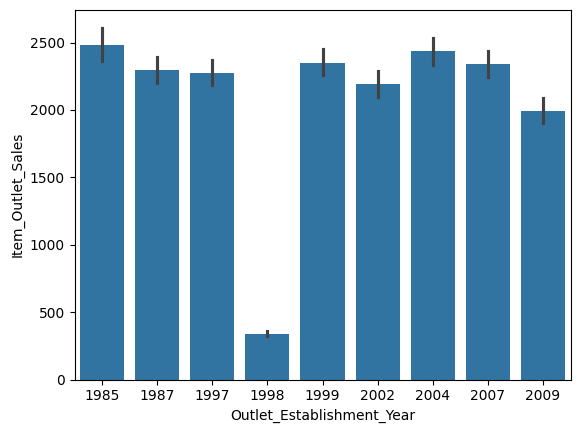

In [93]:
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

In [94]:
year_sales=df.groupby(['Outlet_Establishment_Year'],as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales',ascending=False)
year_sales

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1985,3.633620e+06
6,2004,2.268123e+06
4,1999,2.183970e+06
7,2007,2.167465e+06
1,1987,2.142664e+06
2,1997,2.118395e+06
5,2002,2.036725e+06
8,2009,1.851823e+06
3,1998,1.883402e+05


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

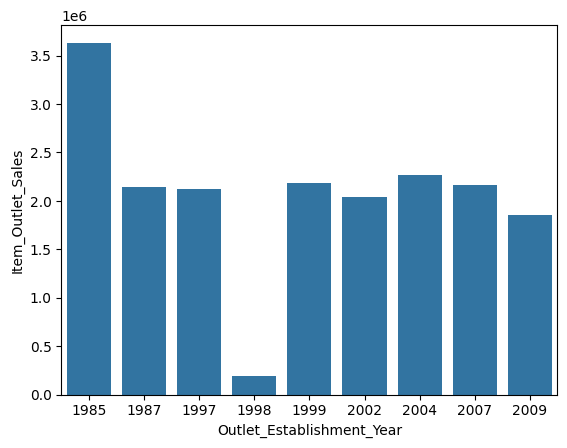

In [95]:
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=year_sales)

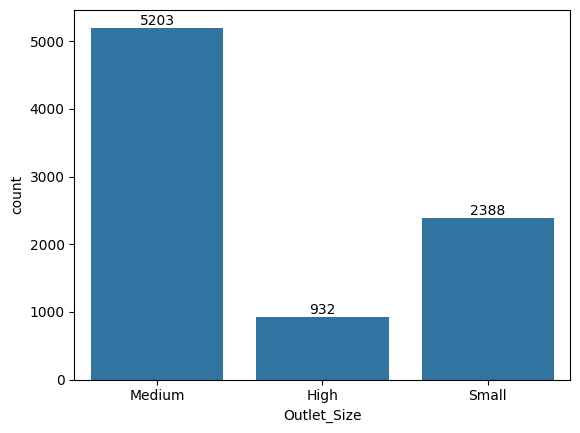

In [96]:
ax=sns.countplot(x='Outlet_Size',data=df)

for bars in ax.containers:
        ax.bar_label(bars)

In [97]:
size_sales=df.groupby(['Outlet_Size'],as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales',ascending=False)
size_sales

,Outlet_Size,Item_Outlet_Sales
1,Medium,1.188225e+07
2,Small,4.566212e+06
0,High,2.142664e+06


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

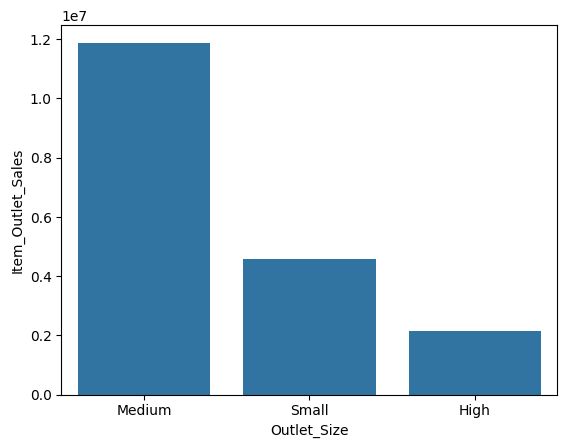

In [98]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=size_sales)

In [99]:
df[df['Item_Outlet_Sales']==13086.9648]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,12.857645,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


In [100]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [101]:
df.select_dtypes(include='object').columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [103]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [104]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [105]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,1999,1,0,1
3,19.200,1,0.000000,6,182.0950,1998,1,2,0
4,8.930,0,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2


In [106]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)

In [108]:
## Scaling

from sklearn.preprocessing import StandardScaler

import pickle 
def scaler_standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    #Saving the model
    file=open('/config/workspace/model/StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [109]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [110]:
lr=LinearRegression()

In [111]:
lr.fit(X_train_scaled,y_train)
y_linear_pred=lr.predict(X_test_scaled)
y_linear_pred

array([2336.85243934, 2490.28996256, 2001.9242653 , ..., 2571.83340353,
        713.69272876, 2363.28550485])

In [112]:
r2_score(y_test,y_linear_pred)

0.5067788392259422

In [113]:
lasso=Lasso(alpha=1)

In [114]:
lasso.fit(X_train_scaled,y_train)
y_lasso_predict=lasso.predict(X_test_scaled)
y_lasso_predict

array([2336.11564027, 2490.70744234, 1999.4488724 , ..., 2568.69208676,
        709.46360971, 2359.02474597])

In [115]:
r2_score(y_test,y_lasso_predict)

0.506843968727087

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

RidgeRegression = Ridge()
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
ridgeRegressor.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [117]:
ridgeRegressor.best_params_

{'alpha': 5}

In [118]:
RidgeRegression=Ridge(alpha=5)

In [119]:
RidgeRegression.fit(X_train_scaled,y_train)
y_ridge_predict=RidgeRegression.predict(X_test_scaled)
y_ridge_predict

array([2336.3600718 , 2490.33815825, 2001.87274034, ..., 2571.13167013,
        714.53656914, 2363.0422346 ])

In [120]:
r2_score(y_test,y_ridge_predict)

0.506765625155347

In [121]:
import pickle
file = open('/config/workspace/model/modelprediction.pkl','wb')
pickle.dump(lr,file)
file.close()